In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr

In [2]:
df=pd.read_csv("hiring.csv")

In [3]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
pip install word2number

In [4]:
from word2number import w2n

In [5]:
#Data Pre Processing
df["experience"]=df["experience"].fillna("zero")

In [6]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [7]:
df["experience"]=df["experience"].apply(w2n.word_to_num)

In [8]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  8 non-null      int64  
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 384.0 bytes


In [24]:
#Renaming of Columns
df.rename(columns={"test_score(out of 10)":"test_score"},inplace=True)
df.rename(columns={"interview_score(out of 10)":"interview_score"},inplace=True)
df.rename(columns={"salary($)":"salary"},inplace=True)

In [25]:
median_test_score=df.test_score.median()

In [26]:
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [27]:
df['test_score']=df['test_score'].fillna(median_test_score)

In [28]:
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [30]:
lr

LinearRegression()

In [60]:
model1=lr.fit(df[['experience']],df.salary)
model2=lr.fit(df[['test_score']],df.salary)
model3=lr.fit(df[['interview_score']],df.salary)
#model=lr.fit(df[['experience','test_score','interview_score']],df.salary)

In [54]:
model

LinearRegression()

In [55]:
# To predict for 2-experience,9-test_score and 6-interview_score
model.predict([[2,9,6]])

array([53205.96797671])

In [56]:
# To predict for 12-experience,10-test_score and 10-interview_score
model.predict([[12,10,10]])

array([92002.18340611])

In [57]:
model.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [58]:
model.intercept_

17737.263464337688

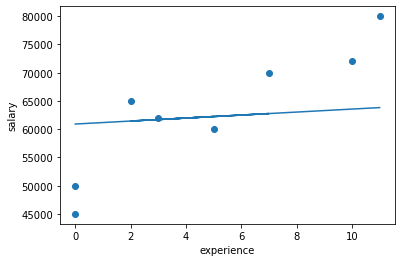

In [61]:
#Linear Regression model
%matplotlib inline
plt.scatter(df.experience,df.salary)
plt.xlabel("experience")
plt.ylabel("salary")
plt.plot(df.experience,model1.predict(df[['experience']]))

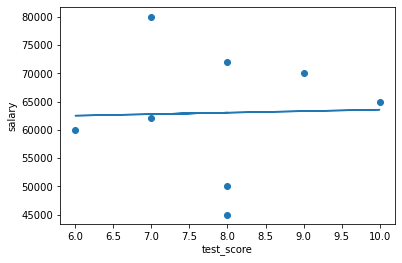

In [63]:
%matplotlib inline
plt.scatter(df.test_score,df.salary)
plt.xlabel("test_score")
plt.ylabel("salary")
plt.plot(df.test_score,model2.predict(df[['test_score']]))

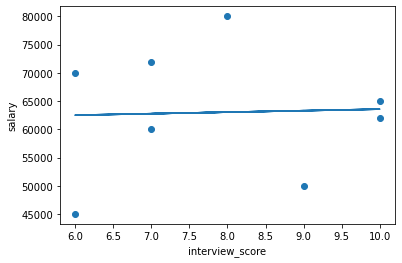

In [64]:
%matplotlib inline
plt.scatter(df.interview_score,df.salary)
plt.xlabel("interview_score")
plt.ylabel("salary")
plt.plot(df.interview_score,model2.predict(df[['interview_score']]))